## Cryptocurrency Market Data Analytics

**Selección de criptomonedas para su estudio:** Para realizar el presente análsiis se eligieron 10 cryptomonedas relevantes según dos criterios, su capitalización de mercado y su importancia o buenos retorno producidos en este año 2023 ([ver referencia](https://finbold.com/top-10-crypto-assets-by-returns-in-2023/)), por un lado tenemos criptomonedas ya establecidas que constituyen un proyecto con asociados y una comunidad destrás como lo son Bitcoin, Ethereum, Cardano (ADA), Solana e incluso The Graph, y por otro lado otras criptomonedas impulsadas por la comunidad con un precio influenciado más por las redes sociales y comunidades en línea generando crecimientos exponenciales y grandes expectativas cacerca de este tipo de tokens como lo son Dogecoin, Shiba Inu, y la criptomoneda que ha tenido más éxito en el presente año PEPE.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from ast import literal_eval
df = pd.read_json("coin_list.json")
BTC = pd.read_json("BTC.json")
ETH = pd.read_json("ETH.json")
BCH = pd.read_json("BCH.json")
DOGE = pd.read_json("DOGE.json")
ADA = pd.read_json("ADA.json")
SOL = pd.read_json("SOL.json")
SHIB = pd.read_json("SHIB.json")
LDO = pd.read_json("LDO.json")
GRT = pd.read_json("GRT.json")
PEPE = pd.read_json("PEPE.json")

**Temporalidad:** Se ha elegido realizar análisis del precio diario con el fin de realizar el análisis para una posible inversión de mediano a largo plazo. Previo a cualquier inversión es importante conocer los riesgos que conllevan, por lo que se brinda el enlace de la delacración conjunta de los miembros de la FED acerca de los [riesgos de los criptoactivos para organizaciones bancarias](https://www.federalreserve.gov/newsevents/pressreleases/files/bcreg20230103a1.pdf), sin embargo estas advertencias pueden aplicar para cualquier iversor.


In [3]:
'''Se realiza función de transformación de los datos de la API para ser tratados como series de tiempo'''
def t_API_coingecko(dataframe):
    dataframe[["date","prices"]] = (dataframe.prices.apply(pd.Series))
    dataframe["market_caps"] = (dataframe.market_caps.apply(pd.Series)[1])
    dataframe["total_volumes"] = (dataframe.total_volumes.apply(pd.Series)[1])
    dataframe["date"] = pd.to_datetime(dataframe["date"], unit='ms')
    dataframe = dataframe[["date", "prices", "market_caps", "total_volumes"]]
    dataframe["date"] = dataframe["date"].dt.strftime("%Y-%m-%d")
    dataframe = dataframe.fillna("0")
    #Calculamos la variación porcentual diaria. Porcentaje negativo significa disminución.
    dataframe["v_porcentual_d"] = dataframe["prices"].pct_change() * 100
    dataframe.loc[0, "v_porcentual_d"] = 0
    return dataframe

In [4]:
'''Se procesan los 10 dataframes por medio de un ciclo for dejando una lista da datafarmes
en la variable "df_procesados'''
lista_cryptos = [BTC, ETH, BCH, DOGE,ADA, SOL, SHIB, LDO, GRT, PEPE]
df_procesados = []
for df in lista_cryptos:
    df_convertido = t_API_coingecko(df)
    df_procesados.append(df_convertido)

In [52]:
'''Se exportan los dataframes anidados en el orden de la lista "lista_cryptos", es decir 0.csv
pertenece a BTC'''
#df_exportados = []
#for idx, df in enumerate(df_procesados):
    #csv= f"Cryptos_csv/{idx}.csv"
    #df.to_csv(csv, index = False)
    #df_exportados.append(csv)

'Se exportan los dataframes anidados en el orden de la lista "lista_cryptos", es decir 0.csv\npertenece a BTC'

In [53]:
#df[df["symbol"].str.contains("pepe")]

## --------- EXPLORATORY DATA ANALYISIS -----------

In [112]:
BTC = df_procesados[0]
ETH = df_procesados[1]
BCH = df_procesados[2]
DOGE = df_procesados[3]
ADA = df_procesados[4]
SOL = df_procesados[5]
SHIB = df_procesados[6]
LDO = df_procesados[7]
GRT = df_procesados[8]
PEPE = df_procesados[9]

### Valores Nulos, faltantes o duplicados

In [5]:
#Generamos un dataframe con valores V/F donde V es un valor duplicado
#La lista de dataframes df_procesados tiene en cada espacio un dataframe de serie de tiempo de criptomonedas
duplicados = pd.DataFrame()
for idx, i in enumerate(df_procesados):
    p=df_procesados[idx].duplicated()
    duplicados[idx] = p
Cuenta_duplicados = duplicados.fillna(False).sum()
Cuenta_duplicados

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [6]:
lst = ["BTC", "ETH", "BCH", "DOGE","ADA", "SOL", "SHIB", "LDO", "GRT", "PEPE"]
nulos_o_cero_df = pd.DataFrame(columns = ["BTC", "ETH", "BCH", "DOGE","ADA", "SOL", "SHIB", "LDO", "GRT", "PEPE"])

for idx, i in enumerate(df_procesados):
    nulos_o_cero = df_procesados[idx].isnull().sum() + (df_procesados[idx] == 0).sum()
    nulos_o_cero_df[(lst[idx])] = nulos_o_cero
    nulos_o_cero_df.loc["#Registros", lst[idx]] = df_procesados[idx].shape[0]
nulos_o_cero_df
#nulos_o_cero.plot(kind="bar", color="red")
#plt.rcParams.update({"font.size" : 4})
#plt.title("Cantidad de Valores Nulos o en Cero por Columna")
#plt.xlabel("Columnas")
#plt.ylabel("Cantidad")
#plt.show()

,BTC,ETH,BCH,DOGE,ADA,SOL,SHIB,LDO,GRT,PEPE
date,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
prices,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
market_caps,0.0,1.0,0.0,0.0,0.0,0.0,274.0,0.0,0.0,2.0
total_volumes,242.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
v_porcentual_d,1.0,1.0,2.0,1.0,23.0,2.0,26.0,2.0,13.0,2.0
#Registros,3763.0,2933.0,2208.0,3531.0,2131.0,1225.0,1098.0,956.0,975.0,123.0


In [7]:
#Revisamos fechas para observar fechas de análisis de cada una de las 10 cryptomonedas elegidas
fechasdf = pd.DataFrame(columns = ["Fechas","BTC", "ETH", "BCH", "DOGE","ADA", "SOL", "SHIB", "LDO", "GRT", "PEPE"])
fechasdf.Fechas = ["min"]
for idx, i in enumerate(lst):
    minimo = df_procesados[idx]["date"].min()
    fechasdf[i] = [minimo]

x=fechasdf.to_numpy().tolist().pop(0)
del x[0]

<BarContainer object of 10 artists>

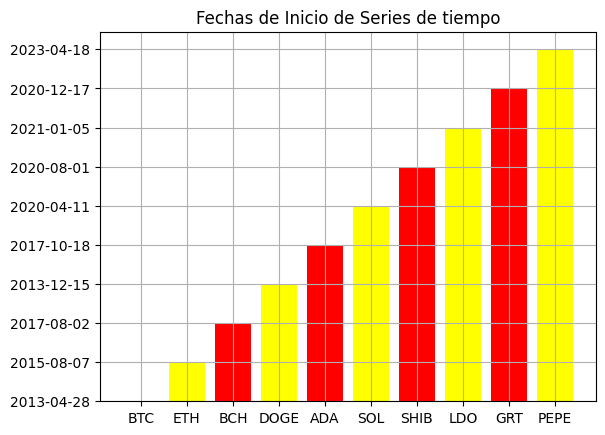

In [8]:
plt.grid(True)
plt.title('Fechas de Inicio de Series de tiempo')
plt.bar(lst,x, color = ["red","yellow"])


Se observa que dentro de las 10 cryptomonedas su fecha de registro en coingecko varía desde el año 2013 para el BTC que es la primer cryptomoneda, hasta el presente año con la criptomoneda PEPE que ha figurado en muchas noticias ya que a pesar de ser una de las denominadas 'memecoin' ha tenido un incremento en su precio importante lo cual vamos a tratar mas adelante.

En la función de transformación "t_API_coingecko" se calculó la variación porcentual diaria, un valor porcentual negativo significa disminución del precio con respecto al día anterior, valor positivo aumento. Para dar perspectiva de los datos de variación porcentual diaria de las cryptos en comparación con la bolsa "tradcional" tomando la acción de [Amazon](https://es.investing.com/equities/amazon-com-inc-historical-data) en cuanto a variación porcentual diaría en el último mes su variación porcentual diaria no llega ni al 2.0%, en el caso de una acción de una empresa relevante en la bosla de valores de Colombia como [Bancolombia](https://es.investing.com/equities/bcolombia-historical-data) su variación diaria porcentual en los últimos 30 días sube al 3.45% pero en promedio la variación es del 1.3% en creicmiento o decrecimiento.

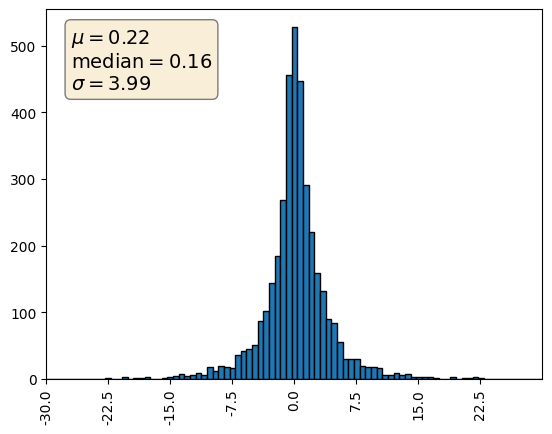

In [9]:
n_bins = 100
x_ticks_values = np.arange(-30, 30, 7.5)
x_ticks_labels = [str(value) for value in x_ticks_values]

fig, ax = plt.subplots()
plt.xlim(-30,30)

mu = df_procesados[0]["v_porcentual_d"].mean()
median = np.median(df_procesados[0]["v_porcentual_d"])
sigma = df_procesados[0]["v_porcentual_d"].std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\mathrm{median}=%.2f$' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xticks(x_ticks_values, x_ticks_labels, rotation = 90)
plt.hist(df_procesados[0]["v_porcentual_d"], n_bins, edgecolor ="black")
plt.show()

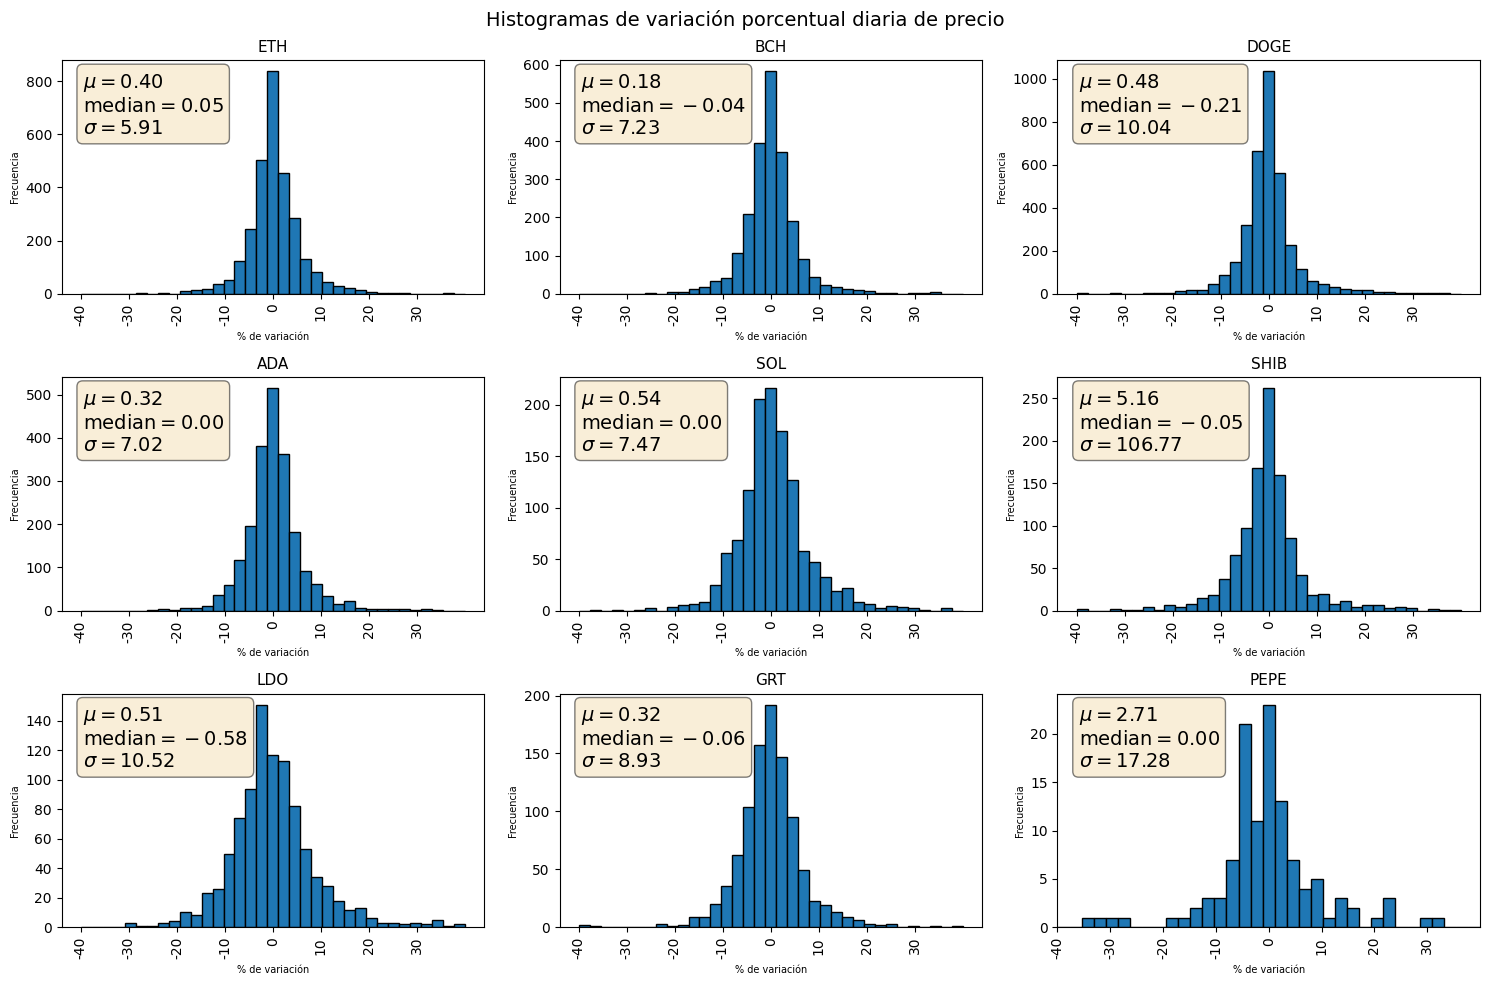

In [14]:
n_bins = 35
x_range = (-40,40)
fig, ((axs0, axs1, axs2), (axs3, axs4, axs5), (axs6, axs7, axs8)) = plt.subplots(3, 3, figsize=(15,10), tight_layout=True)
dataframes = [df_procesados[1], df_procesados[2], df_procesados[3],
              df_procesados[4], df_procesados[5], df_procesados[6],
              df_procesados[7], df_procesados[8], df_procesados[9]]

x_ticks_values = np.arange(-40, 40, 10)
plt.xticks(x_ticks_values, x_ticks_labels, rotation = 90)
fig.suptitle('Histogramas de variación porcentual diaria de precio', fontsize = 14)
x_ticks_labels = [str(value) for value in x_ticks_values]
for i, ax in enumerate([axs0, axs1, axs2, axs3, axs4, axs5, axs6, axs7, axs8]):

    mu = df_procesados[i+1]["v_porcentual_d"].mean()
    median = np.median(df_procesados[i+1]["v_porcentual_d"])
    sigma = df_procesados[i+1]["v_porcentual_d"].std()
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)



    ax.hist(dataframes[i]["v_porcentual_d"], edgecolor="black", bins=n_bins, range=x_range)
    ax.set_title(lst[i+1], fontsize = 11)
    ax.set_xlabel('% de variación', fontsize = "7")
    ax.set_ylabel('Frecuencia', fontsize = "7")
    ax.set_xticks(x_ticks_values)
    ax.set_xticklabels(x_ticks_labels, rotation=90, fontsize=10)
    plt.xlim(-40,40)
    ax.tick_params(axis='y', labelsize=10)
    plt.xticks(x_ticks_values, x_ticks_labels, rotation = 90)
plt.show()

En los histogramas de las variaciones diarias de las diferentes cryptomonedas se observan valores simétricos y unimodales con excepción de PEPE que presenta dos modas, sin embargo hay que considerar que el tamaño de la muestra de PEPE es mucho menor.

Se observa gráficamente una baja dispersión, el gráfico que mas presenta disperción es el de LDO, sin embargo si observamos los gráficos en prácticamente todos los casos tenemos altas frecuencias en el rango de -5% a +5% lo cual para un activo en el que se invierte es una variación diaria bastante alta, sin embargo al observarse una simetría en general podríamos inferir de que la probabilidad de que aumente o disminuya es similar a nivel general.


In [247]:
#Se genera un único dataframe de serie de tiempo por la 10 monedas, la columna se llamará como la cryptomoneda.
cp = []
for idx, i in enumerate(df_procesados):
    df_precio = df_procesados[idx].rename(columns={"prices": lst[idx] }).drop(columns = ["market_caps","total_volumes","v_porcentual_d"])
    cp.append(df_precio)

st_precios = cp[0]
for idx in range(1, len(cp)):
    st_precios = pd.merge(st_precios, cp[idx], on="date", how = "outer")
st_precios["date"] = pd.to_datetime(st_precios["date"])

Abajo encontramos la matriz de correlación de las 10 criptomonedas en estudio, el punto de comparación siempre va a ser Bitcoin ya que es la criptomoneda más popular, con mayor capitalización en el mercado y es la pripmera criptomoneda. Dicho lo anterior podemos observar en la matriz de correlación en la imágen abajo que la gran mayoría de los casos tenemos un coeficiente de correlación positiva, entre más cerca a 1 indica que ante un alza ambas van a subir, es decir vamos a tener una relación directa, por ejemplo miremos la correlación de BTC con ETH, DOGE y ADA que es más del 85% lo cual inidca que hay una tendencia de estas 3 monedas a seguir el precio del Bitcoin sea tendencia alcista o bajista.

Para interpretar qué tan fuerte es la correlación podemos utilizar el criterio de Cohen (1988), quien para valores absolutos indica que valores entre:

    0.1 - 0.3 representan un efecto pequeño,
    0.3 - 0.5 un efecto medio y
    mayor que 0.5 un efecto grande.

Text(0.5, 1.0, 'Natriz de correlación entre criptomonedas')

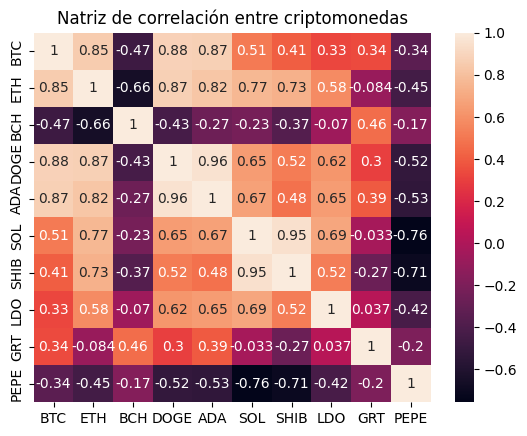

In [292]:

corr_st_precios = st_precios[["BTC", "ETH", "BCH", "DOGE","ADA", "SOL", "SHIB", "LDO", "GRT", "PEPE"]].corr()
dataplot = sns.heatmap(corr_st_precios.corr(), annot=True)
plt.title("Natriz de correlación entre criptomonedas")

Text(0, 0.5, 'Precio (USD)')

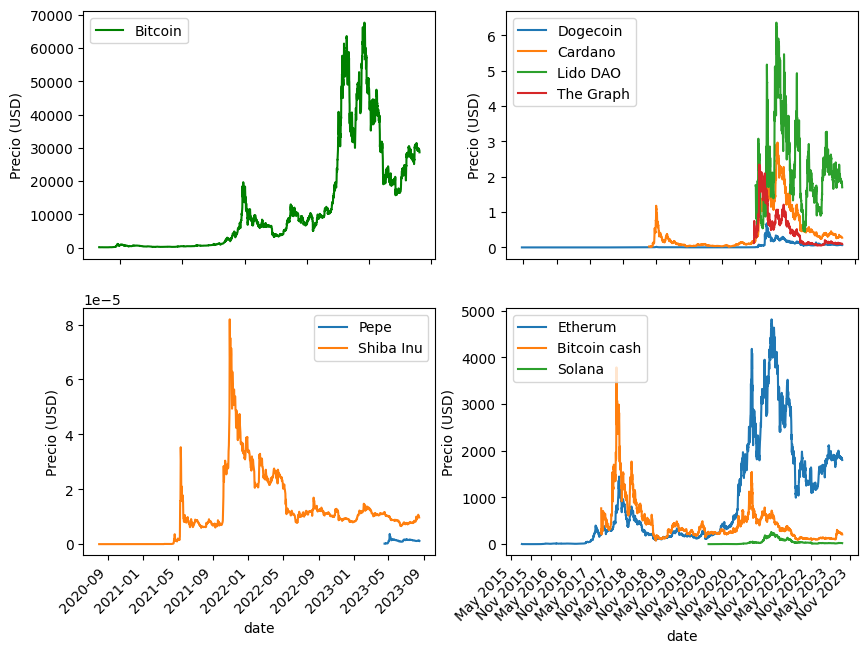

In [285]:
from matplotlib import dates as mpl_dates
import matplotlib.dates as mdates
fig,ax =  plt.subplots( 2, 2,figsize = ( 10, 8))
sns.lineplot(x = "date", y = "ETH", data = st_precios, label = "Etherum")
sns.lineplot(x = "date", y = "BCH", data = st_precios, label = "Bitcoin cash")
sns.lineplot(x = "date", y = "SOL", data = st_precios, label = "Solana")
plt.ylabel("Precio (USD)")
x_ticks_labels = [str(value) for value in x_ticks_values]
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

ax[0][0].tick_params("x", labelrotation = 45)
sns.lineplot( x = "date", y = "BTC", color = 'g', data = st_precios, ax = ax[0][0], label = "Bitcoin")
ax[0][0].set_ylabel("Precio (USD)")

ax[0][1].tick_params("x",labelrotation = 45)
sns.lineplot( x = "date", y = "DOGE", data = st_precios,ax = ax[0][1], label = "Dogecoin")
sns.lineplot( x = "date", y = "ADA", data = st_precios,ax = ax[0][1], label = "Cardano")
sns.lineplot( x = "date", y = "LDO", data = st_precios,ax = ax[0][1], label = "Lido DAO")
sns.lineplot( x = "date", y = "GRT", data = st_precios,ax = ax[0][1], label = "The Graph")
ax[0][1].set_ylabel("Precio (USD)")

ax[1][0].tick_params("x",labelrotation = 45)
sns.lineplot( x = "date", y = "PEPE", data = st_precios,ax = ax[1][0], label = "Pepe")
sns.lineplot( x = "date", y = "SHIB", data = st_precios,ax = ax[1][0], label = "Shiba Inu")
ax[1][0].set_ylabel("Precio (USD)")


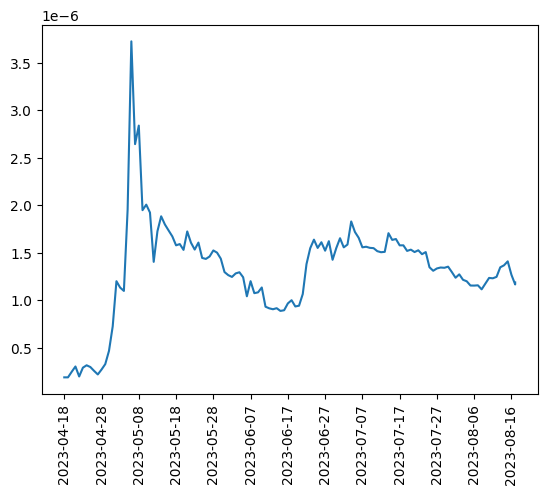

In [ ]:
x = PEPE.date
y = PEPE.prices

fig, ax = plt.subplots()
plt.xticks(rotation=90)
x_ticks = np.arange(0,250,10)
ax.set_xticks(x_ticks)
plt.plot(x,y)